# Example 3: Maritime Inventory Routing Problems with the CIM

We now introduce a new problem that takes advantage of the coherent Ising machine's ability to incorporate external fields: maritime inventory routing problems (MIRP). These problems contain an external field term, and are solved with our Amplitude Heterogeneity Correction Solver. In particular, we focus on a subset of the MIRP problems known as the vehicle routing problem with time windows (VRPTW). 

## Loading J and h matrices

In [1]:
#Initialization and Imports
import sys
from pathlib import Path
sys.path.append(str(Path.cwd()) + "\\..\\") # append lib folder to list of search directories 

from cim_optimizer.solve_Ising import *
from cim_optimizer.CIM_helper import brute_force, load_adjMatrix_from_rudy

%matplotlib inline

## Loading N=308 Sequence-Based VRPTW Problem

Since our MIRP examples are saved with modified start_index and preset_size, we have to overload the load_adjMatrix_from_rudy function provided in CIM_helper.py. These problems include an external field, so both J and h matrices have to be loaded from the rudy file.

In [2]:
inst_path_str_genVRPTW = str(Path.cwd()) + "\\..\\instances\\VRPTW_TestSet\\"

# loading N=308 sequence-based MIRP problem
J, h = load_adjMatrix_from_rudy(inst_path_str_genVRPTW + "test_sb_308_f.rudy", delimiter='\t', index_start=1, preset_size=308)
J = -J # flip sign to compute minima instead of maxima
ground_state_energy = -2757.50
time_span = 10000

In [3]:
vrptw_test_run = Ising(J, h).solve(num_timesteps_per_run = time_span, target_energy = ground_state_energy, hyperparameters_randomtune = False)

External Field Detected
Target Ising Energy: -2757.5.
Best Ising Energy Found: -2745.5.
Corresponding Spin Configuration: [-1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.
 -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -

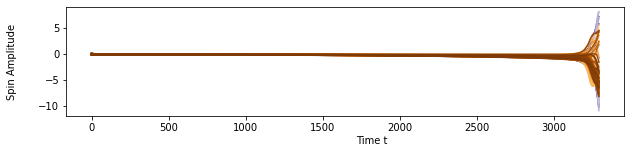

In [4]:
vrptw_test_run.result.plot_spin_trajectories(plot_type="spins")

Due to the complex nature of the maritime inventory routing problems (when converted to an Ising problem), the coherent Ising machine has difficulty achieving the global minimum. To achieve a lower energy, we utilize hyperparameter tuning. Since we are unfamiliar with the optimal hyperparameter selection, we utilize random hyperparameter tuning as opposed to BOHB hyperparameter tuning.

In [5]:
vrptw_test_run = Ising(J, h).solve(num_timesteps_per_run = time_span, target_energy = ground_state_energy, hyperparameters_randomtune=True, suppress_statements=True)
print(f"Minimum Energy Achieved with: {vrptw_test_run.result.lowest_energy}")


External Field Detected
Best combination of epsilon, lambda, and scaling constant: epsilon = 0.333; lambda = 0.001; scaling constant = 10.0
Minimum Energy Achieved with: -2730.5
